## Thời Gian Mô Phỏng 200 phút

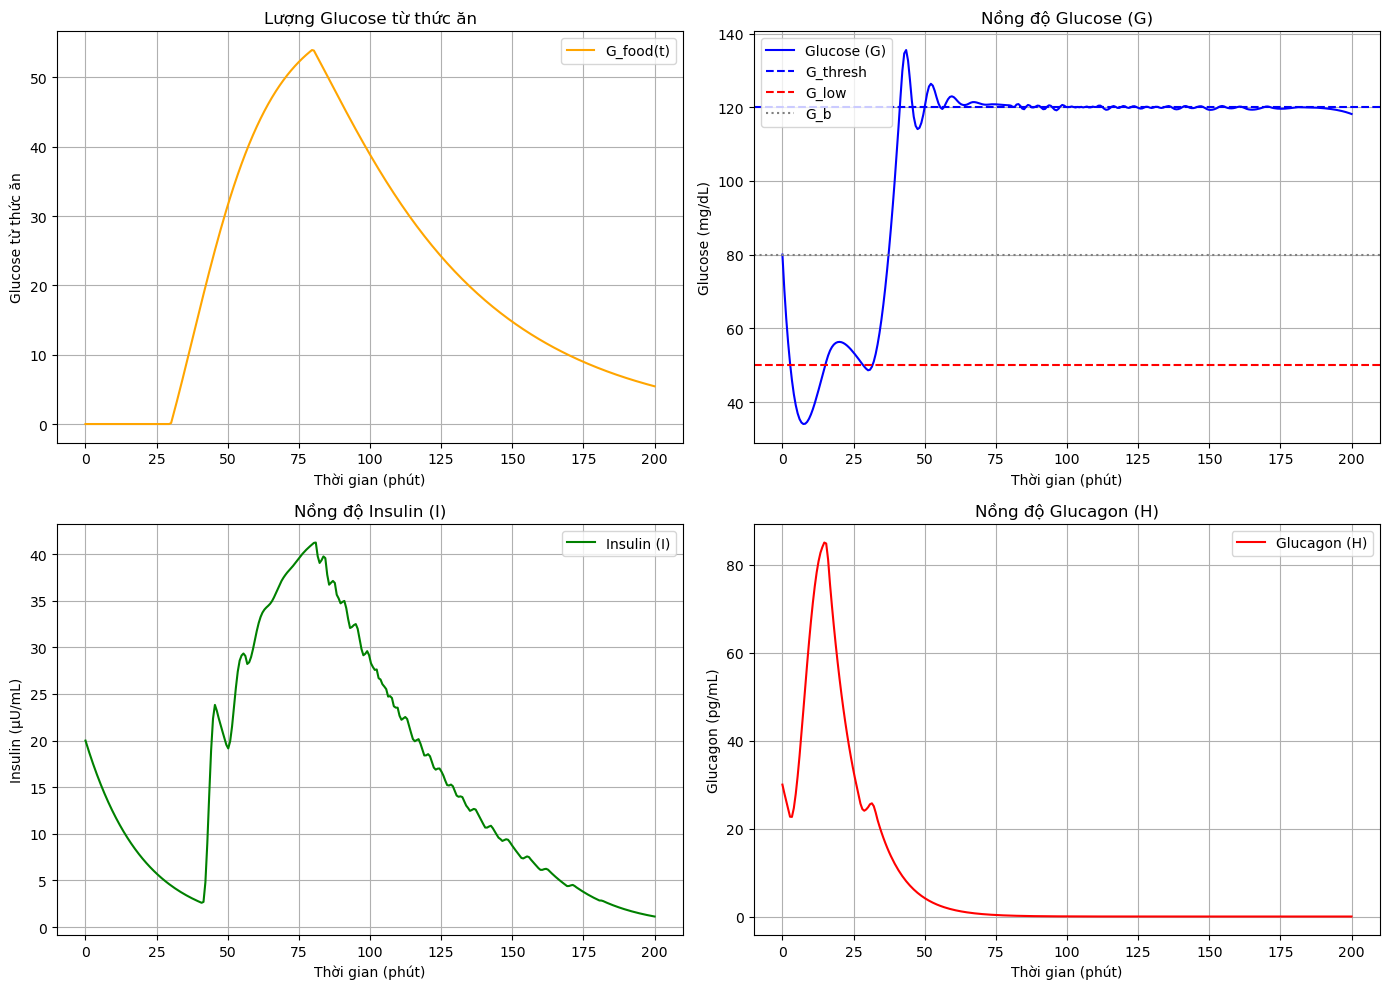

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Tham số mô hình
G_max = 60         # Lượng glucose tối đa từ thức ăn
alpha = 0.08       # Hệ số của hàm sigmoid
beta = 0.02        # Hệ số giảm dần sau khi đạt đỉnh
gamma = 0.05       # Hệ số mượt mà hóa sự tăng ban đầu
t0 = 30            # Thời điểm bắt đầu tiêu thụ thức ăn (phút 30)
t1 = 80          # Thời điểm bắt đầu giảm hấp thụ glucose (sau khi đạt đỉnh)

k1 = 0.05            # Tốc độ tiêu thụ glucose nền
k2 = 0.01           # Tác động của insulin đến việc tiêu thụ glucose
k3 = 0.1
i_g = 0.5           # Tốc độ sản xuất insulin khi glucose vượt ngưỡng
i_b = 0.05          # Tốc độ phân hủy insulin khi glucose dưới ngưỡng
h_g = 0.5           # Tốc độ sản xuất glucagon khi glucose dưới ngưỡng thấp
h_b = 0.1           # Tốc độ phân hủy glucagon khi glucose vượt ngưỡng thấp

G_thresh = 120      # Ngưỡng glucose kích hoạt insulin
G_low = 50          # Ngưỡng glucose kích hoạt glucagon
G_b = 80            # Nồng độ glucose cơ bản (mục tiêu cân bằng)
H_b = 25            # Nồng độ glucagon cơ bản (mục tiêu cân bằng)

# Hàm sigmoid mượt mà điều chỉnh
def G_food(t):
    if t < t0:
        return 0
    elif t < t1:
        # Mức tăng mượt mà từ 0 sau t0
        return G_max / (1 + np.exp(-alpha * (t - t0))) * (1 - np.exp(-gamma * (t - t0)))
    else:
        # Giảm dần sau khi đạt đỉnh
        return (G_max / (1 + np.exp(-alpha * (t - t0))) * (1 - np.exp(-gamma * (t - t0)))) * np.exp(-beta * (t - t1))

# Hệ phương trình vi phân cho glucose, insulin và glucagon
def model(t, y):
    G, I, H = y
    
    # Dẫn xuất của glucose
    dG_dt = (G_food(t) - k1 * (G - G_b) - k2 * I * G + k3 * (H - H_b))
    
    # Phản ứng của insulin dựa trên nồng độ glucose
    if G > G_thresh:
        dI_dt = i_g * (G - G_thresh)
    else:
        dI_dt = -i_b * I
    
    # Phản ứng của glucagon dựa trên nồng độ glucose
    if G < G_low:
        dH_dt = h_g * (G_low - G)
    else:
        dH_dt = -h_b * H
    
    return [dG_dt, dI_dt, dH_dt]

# Điều kiện ban đầu
G0 = 80  # Nồng độ glucose ban đầu
I0 = 20  # Nồng độ insulin ban đầu
H0 = 30  # Nồng độ glucagon ban đầu

# Thời gian mô phỏng trong 600 phút
t_span = [0, 200]
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Giải hệ phương trình vi phân
sol = solve_ivp(model, t_span, [G0, I0, H0], t_eval=t_eval)

# Trích xuất kết quả
t = sol.t
G = sol.y[0]
I = sol.y[1]
H = sol.y[2]

# Tạo các biểu đồ riêng biệt cho mỗi phương trình
plt.figure(figsize=(14, 10))

# Biểu đồ Glucose từ thức ăn
plt.subplot(2, 2, 1)
G_food_vals = np.array([G_food(ti) for ti in t])
plt.plot(t, G_food_vals, label='G_food(t)', color='orange')
plt.title('Lượng Glucose từ thức ăn')
plt.xlabel('Thời gian (phút)')
plt.ylabel('Glucose từ thức ăn')
plt.grid(True)
plt.legend()

# Biểu đồ nồng độ Glucose theo thời gian
plt.subplot(2, 2, 2)
plt.plot(t, G, label='Glucose (G)', color='blue')
plt.axhline(G_thresh, color='blue', linestyle='--', label='G_thresh')
plt.axhline(G_low, color='red', linestyle='--', label='G_low')
plt.axhline(G_b, color='gray', linestyle=':', label='G_b')
plt.title('Nồng độ Glucose (G)')
plt.xlabel('Thời gian (phút)')
plt.ylabel('Glucose (mg/dL)')
plt.grid(True)
plt.legend()

# Biểu đồ nồng độ Insulin theo thời gian
plt.subplot(2, 2, 3)
plt.plot(t, I, label='Insulin (I)', color='green')
plt.title('Nồng độ Insulin (I)')
plt.xlabel('Thời gian (phút)')
plt.ylabel('Insulin (µU/mL)')
plt.grid(True)
plt.legend()

# Biểu đồ nồng độ Glucagon theo thời gian
plt.subplot(2, 2, 4)
plt.plot(t, H, label='Glucagon (H)', color='red')
plt.title('Nồng độ Glucagon (H)')
plt.xlabel('Thời gian (phút)')
plt.ylabel('Glucagon (pg/mL)')
plt.grid(True)
plt.legend()

plt.savefig('Glucose_Isulin_Glucagon_200p')
plt.tight_layout()
plt.show()


## Thời Gian Mô Phỏng 400 phút

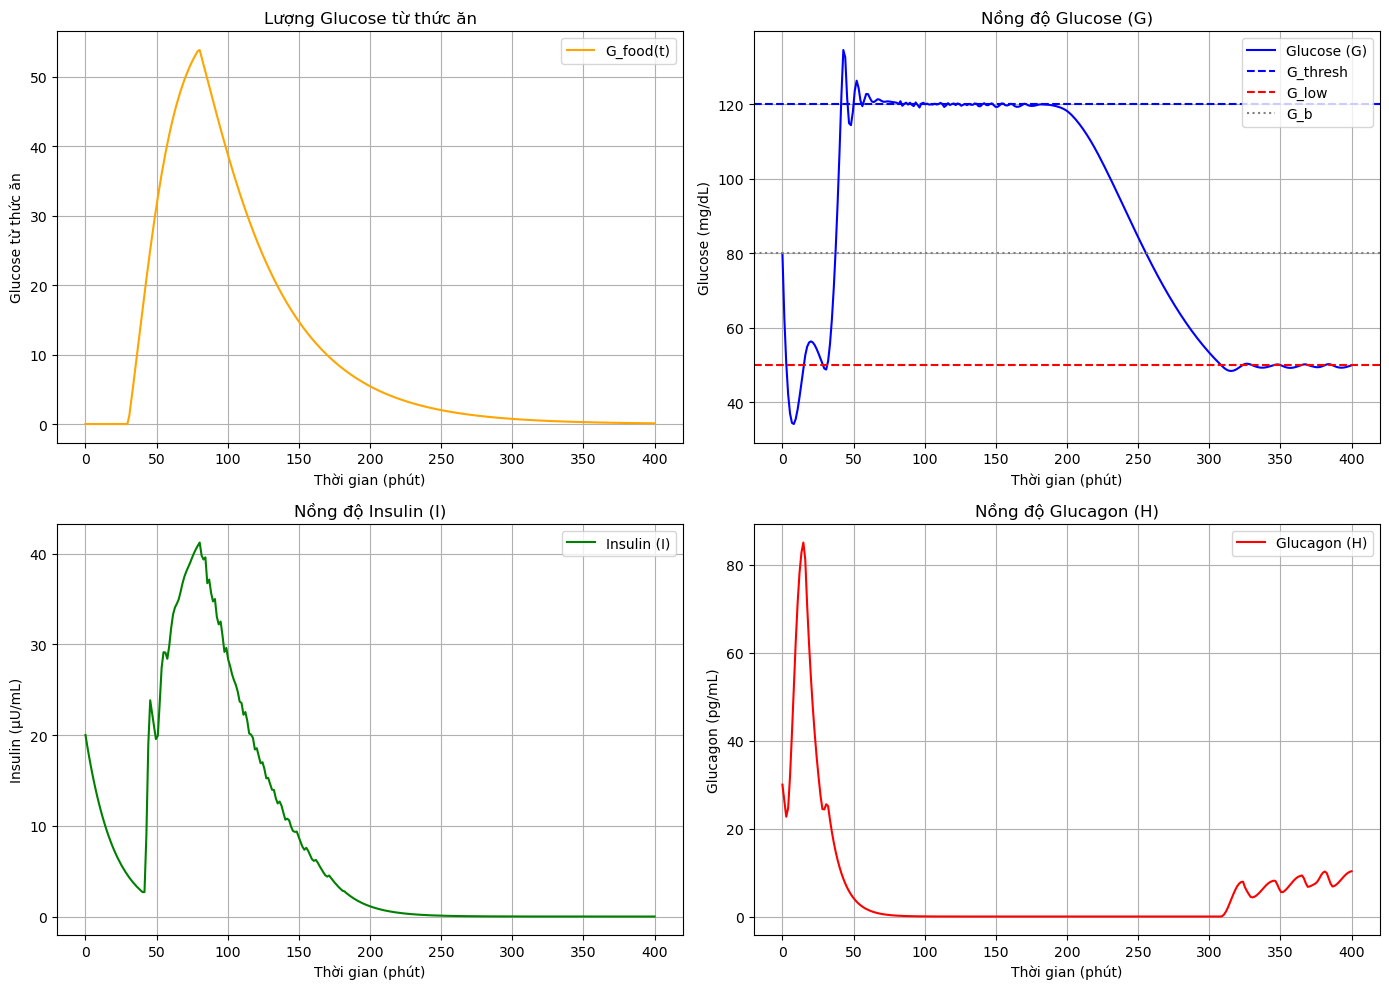

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Tham số mô hình
G_max = 60         # Lượng glucose tối đa từ thức ăn
alpha = 0.08       # Hệ số của hàm sigmoid
beta = 0.02        # Hệ số giảm dần sau khi đạt đỉnh
gamma = 0.05       # Hệ số mượt mà hóa sự tăng ban đầu
t0 = 30            # Thời điểm bắt đầu tiêu thụ thức ăn (phút 30)
t1 = 80          # Thời điểm bắt đầu giảm hấp thụ glucose (sau khi đạt đỉnh)

k1 = 0.05            # Tốc độ tiêu thụ glucose nền
k2 = 0.01           # Tác động của insulin đến việc tiêu thụ glucose
k3 = 0.1
i_g = 0.5           # Tốc độ sản xuất insulin khi glucose vượt ngưỡng
i_b = 0.05          # Tốc độ phân hủy insulin khi glucose dưới ngưỡng
h_g = 0.5           # Tốc độ sản xuất glucagon khi glucose dưới ngưỡng thấp
h_b = 0.1           # Tốc độ phân hủy glucagon khi glucose vượt ngưỡng thấp

G_thresh = 120      # Ngưỡng glucose kích hoạt insulin
G_low = 50          # Ngưỡng glucose kích hoạt glucagon
G_b = 80            # Nồng độ glucose cơ bản (mục tiêu cân bằng)
H_b = 25            # Nồng độ glucagon cơ bản (mục tiêu cân bằng)

# Hàm sigmoid mượt mà điều chỉnh
def G_food(t):
    if t < t0:
        return 0
    elif t < t1:
        # Mức tăng mượt mà từ 0 sau t0
        return G_max / (1 + np.exp(-alpha * (t - t0))) * (1 - np.exp(-gamma * (t - t0)))
    else:
        # Giảm dần sau khi đạt đỉnh
        return (G_max / (1 + np.exp(-alpha * (t - t0))) * (1 - np.exp(-gamma * (t - t0)))) * np.exp(-beta * (t - t1))

# Hệ phương trình vi phân cho glucose, insulin và glucagon
def model(t, y):
    G, I, H = y
    
    # Dẫn xuất của glucose
    dG_dt = (G_food(t) - k1 * (G - G_b) - k2 * I * G + k3 * (H - H_b))
    
    # Phản ứng của insulin dựa trên nồng độ glucose
    if G > G_thresh:
        dI_dt = i_g * (G - G_thresh)
    else:
        dI_dt = -i_b * I
    
    # Phản ứng của glucagon dựa trên nồng độ glucose
    if G < G_low:
        dH_dt = h_g * (G_low - G)
    else:
        dH_dt = -h_b * H
    
    return [dG_dt, dI_dt, dH_dt]

# Điều kiện ban đầu
G0 = 80  # Nồng độ glucose ban đầu
I0 = 20  # Nồng độ insulin ban đầu
H0 = 30  # Nồng độ glucagon ban đầu

# Thời gian mô phỏng trong 600 phút
t_span = [0, 400]
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Giải hệ phương trình vi phân
sol = solve_ivp(model, t_span, [G0, I0, H0], t_eval=t_eval)

# Trích xuất kết quả
t = sol.t
G = sol.y[0]
I = sol.y[1]
H = sol.y[2]

# Tạo các biểu đồ riêng biệt cho mỗi phương trình
plt.figure(figsize=(14, 10))

# Biểu đồ Glucose từ thức ăn
plt.subplot(2, 2, 1)
G_food_vals = np.array([G_food(ti) for ti in t])
plt.plot(t, G_food_vals, label='G_food(t)', color='orange')
plt.title('Lượng Glucose từ thức ăn')
plt.xlabel('Thời gian (phút)')
plt.ylabel('Glucose từ thức ăn')
plt.grid(True)
plt.legend()

# Biểu đồ nồng độ Glucose theo thời gian
plt.subplot(2, 2, 2)
plt.plot(t, G, label='Glucose (G)', color='blue')
plt.axhline(G_thresh, color='blue', linestyle='--', label='G_thresh')
plt.axhline(G_low, color='red', linestyle='--', label='G_low')
plt.axhline(G_b, color='gray', linestyle=':', label='G_b')
plt.title('Nồng độ Glucose (G)')
plt.xlabel('Thời gian (phút)')
plt.ylabel('Glucose (mg/dL)')
plt.grid(True)
plt.legend()

# Biểu đồ nồng độ Insulin theo thời gian
plt.subplot(2, 2, 3)
plt.plot(t, I, label='Insulin (I)', color='green')
plt.title('Nồng độ Insulin (I)')
plt.xlabel('Thời gian (phút)')
plt.ylabel('Insulin (µU/mL)')
plt.grid(True)
plt.legend()

# Biểu đồ nồng độ Glucagon theo thời gian
plt.subplot(2, 2, 4)
plt.plot(t, H, label='Glucagon (H)', color='red')
plt.title('Nồng độ Glucagon (H)')
plt.xlabel('Thời gian (phút)')
plt.ylabel('Glucagon (pg/mL)')
plt.grid(True)
plt.legend()

plt.savefig('Glucose_Isulin_Glucagon_400p')
plt.tight_layout()
plt.show()


### Chú thích mô hình: 
- Glucose : Nồng độ Glucose thời điểm được ghi nhận
- G_thresh : Mức kích hoạt hocmon Isulin
- G_low : Mức kích hoạt hocmon Glucagon
    
Ta thấy mô hình chia làm 3 giai đoạn chính:
- Giai đoạn 1: Khi thức ăn chưa được chuyển hóa thành glucose thì nồng độ glucose trong máu giảm, kéo theo đó cơ thể ức chế sản
xuất isulin, và cũng lúc đó cơ thể sản xuất HoccMon Glucagon để chuyển hóa Glucogen thành Glucose làm cho nồng độ Glucose 
trong máu không bị thấp quá ngưỡng thông thường
- Giai đoạn 2: Khi thức ăn được tiêu hóa, nồng độ Glucose tăng mạnh, kéo theo đó tuyến tụy nhanh chóng tiết ra hocmon Isulin để không cho
lượng Glucose trong máu tăng quá mức cho phép.
- Giai đoạn 3: Khi lượng Glucose hấp thụ từ thực phẩm đã cạn kiệt, nồng độ glucose trong máu giảm và do tiếp tục không có nguồn
cung cấp Glucose bên ngoài, nồng độ Glucose sẽ giảm tới mức kích hoạt Hocmon Glucagon để không cho nồng độ Glucose thấp quá
ngưỡng cho phép

## Thời Gian Mô Phỏng 600 phút

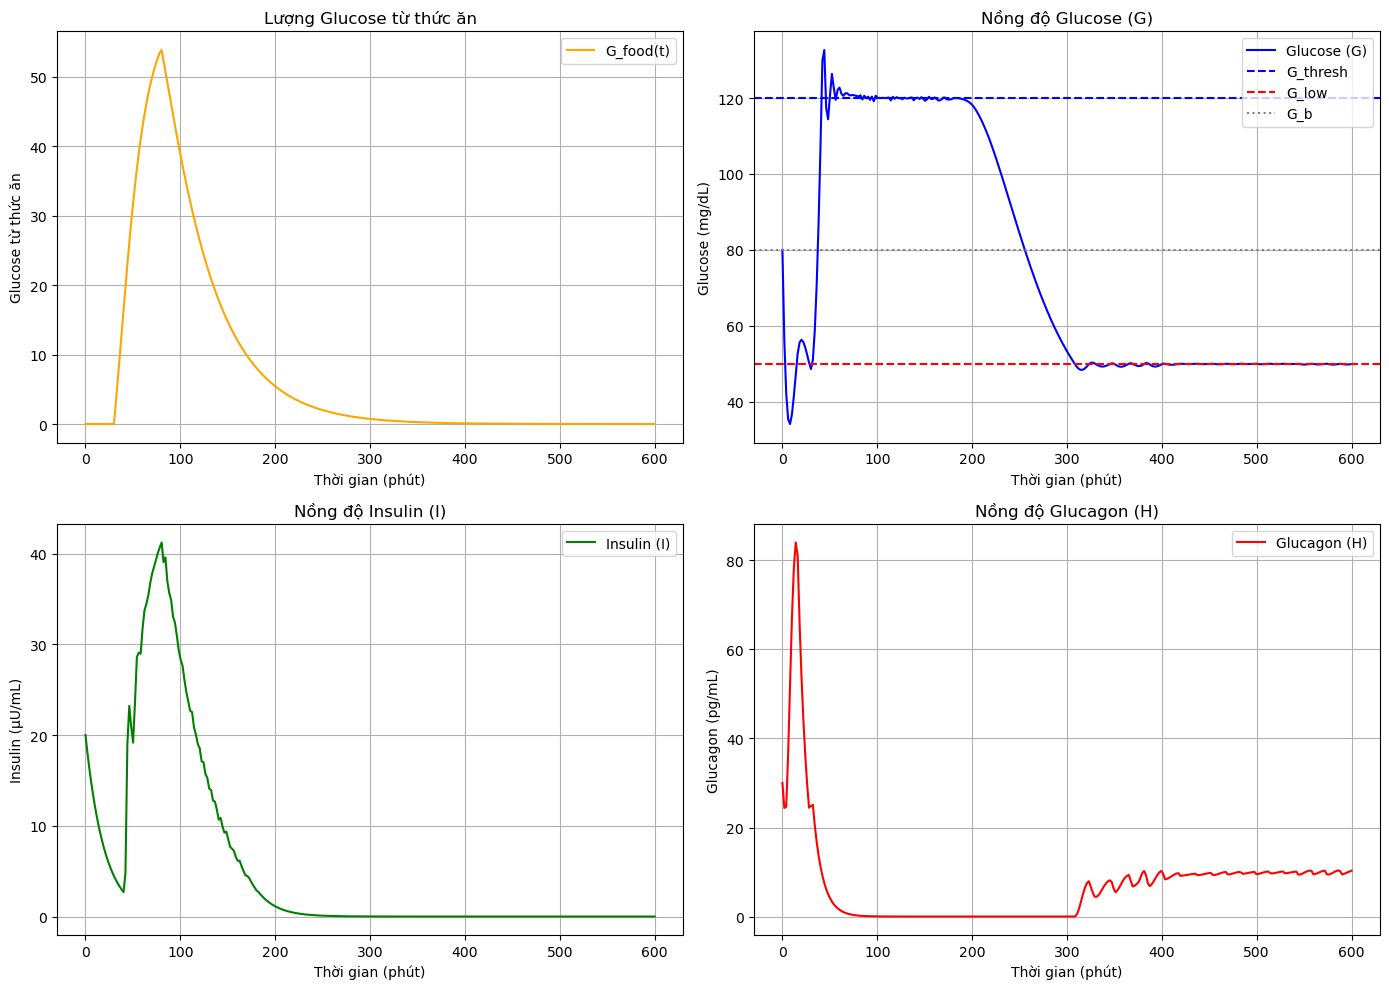

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Tham số mô hình
G_max = 60         # Lượng glucose tối đa từ thức ăn
alpha = 0.08       # Hệ số của hàm sigmoid
beta = 0.02        # Hệ số giảm dần sau khi đạt đỉnh
gamma = 0.05       # Hệ số mượt mà hóa sự tăng ban đầu
t0 = 30            # Thời điểm bắt đầu tiêu thụ thức ăn (phút 30)
t1 = 80          # Thời điểm bắt đầu giảm hấp thụ glucose (sau khi đạt đỉnh)

k1 = 0.05            # Tốc độ tiêu thụ glucose nền
k2 = 0.01           # Tác động của insulin đến việc tiêu thụ glucose
i_g = 0.5           # Tốc độ sản xuất insulin khi glucose vượt ngưỡng
i_b = 0.05          # Tốc độ phân hủy insulin khi glucose dưới ngưỡng
h_g = 0.5           # Tốc độ sản xuất glucagon khi glucose dưới ngưỡng thấp
h_b = 0.1           # Tốc độ phân hủy glucagon khi glucose vượt ngưỡng thấp

G_thresh = 120      # Ngưỡng glucose kích hoạt insulin
G_low = 50          # Ngưỡng glucose kích hoạt glucagon
G_b = 80            # Nồng độ glucose cơ bản (mục tiêu cân bằng)
H_b = 25            # Nồng độ glucagon cơ bản (mục tiêu cân bằng)

# Hàm sigmoid mượt mà điều chỉnh
def G_food(t):
    if t < t0:
        return 0
    elif t < t1:
        # Mức tăng mượt mà từ 0 sau t0
        return G_max / (1 + np.exp(-alpha * (t - t0))) * (1 - np.exp(-gamma * (t - t0)))
    else:
        # Giảm dần sau khi đạt đỉnh
        return (G_max / (1 + np.exp(-alpha * (t - t0))) * (1 - np.exp(-gamma * (t - t0)))) * np.exp(-beta * (t - t1))

# Hệ phương trình vi phân cho glucose, insulin và glucagon
def model(t, y):
    G, I, H = y
    
    # Dẫn xuất của glucose
    dG_dt = (G_food(t) - k1 * (G - G_b) - k2 * I * G + k3 * (H - H_b))
    
    # Phản ứng của insulin dựa trên nồng độ glucose
    if G > G_thresh:
        dI_dt = i_g * (G - G_thresh)
    else:
        dI_dt = -i_b * I
    
    # Phản ứng của glucagon dựa trên nồng độ glucose
    if G < G_low:
        dH_dt = h_g * (G_low - G)
    else:
        dH_dt = -h_b * H
    
    return [dG_dt, dI_dt, dH_dt]

# Điều kiện ban đầu
G0 = 80  # Nồng độ glucose ban đầu
I0 = 20  # Nồng độ insulin ban đầu
H0 = 30  # Nồng độ glucagon ban đầu

# Thời gian mô phỏng trong 600 phút
t_span = [0, 600]
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Giải hệ phương trình vi phân
sol = solve_ivp(model, t_span, [G0, I0, H0], t_eval=t_eval)

# Trích xuất kết quả
t = sol.t
G = sol.y[0]
I = sol.y[1]
H = sol.y[2]

# Tạo các biểu đồ riêng biệt cho mỗi phương trình
plt.figure(figsize=(14, 10))

# Biểu đồ Glucose từ thức ăn
plt.subplot(2, 2, 1)
G_food_vals = np.array([G_food(ti) for ti in t])
plt.plot(t, G_food_vals, label='G_food(t)', color='orange')
plt.title('Lượng Glucose từ thức ăn')
plt.xlabel('Thời gian (phút)')
plt.ylabel('Glucose từ thức ăn')
plt.grid(True)
plt.legend()

# Biểu đồ nồng độ Glucose theo thời gian
plt.subplot(2, 2, 2)
plt.plot(t, G, label='Glucose (G)', color='blue')
plt.axhline(G_thresh, color='blue', linestyle='--', label='G_thresh')
plt.axhline(G_low, color='red', linestyle='--', label='G_low')
plt.axhline(G_b, color='gray', linestyle=':', label='G_b')
plt.title('Nồng độ Glucose (G)')
plt.xlabel('Thời gian (phút)')
plt.ylabel('Glucose (mg/dL)')
plt.grid(True)
plt.legend()

# Biểu đồ nồng độ Insulin theo thời gian
plt.subplot(2, 2, 3)
plt.plot(t, I, label='Insulin (I)', color='green')
plt.title('Nồng độ Insulin (I)')
plt.xlabel('Thời gian (phút)')
plt.ylabel('Insulin (µU/mL)')
plt.grid(True)
plt.legend()

# Biểu đồ nồng độ Glucagon theo thời gian
plt.subplot(2, 2, 4)
plt.plot(t, H, label='Glucagon (H)', color='red')
plt.title('Nồng độ Glucagon (H)')
plt.xlabel('Thời gian (phút)')
plt.ylabel('Glucagon (pg/mL)')
plt.grid(True)
plt.legend()

plt.savefig('Glucose_Isulin_Glucagon_600p')
plt.tight_layout()
plt.show()
